# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [2]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
        
image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t', encoding = 'utf-8')

In [4]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

*Due to the Tweepy API not working as intended, I've opted to use the txt file of json objects provided by Udacity. Below we will complete our gathering phase by reading the json objects and extracting the neccessary information in order to form the* **json_tweets dataframe**.

In [5]:
# create empty list for tweets
# read each line of tweet-json.txt
# append each line to tweets list

tweets = []
for line in open('tweet-json.txt', 'r', encoding='utf-8'):
    tweets.append(json.loads(line))

In [6]:
tweets[1]

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w

In [7]:
# create empty list
# use for loop to store values in variables
# append values to empty list
# add values to a pandas dataframe

tweets_data = []

for i in range(len(tweets)):
    
    tweet_id = tweets[i]["id"]
    tweet_time = tweets[i]["created_at"]
    tweet = tweets[i]["full_text"]
    likes = tweets[i]["favorite_count"]
    retweets = tweets[i]['retweet_count']
    followers = tweets[i]["user"]["followers_count"]
    
   
    tweets_data.append({'tweet_id': str(tweet_id),
                        'tweet_time': pd.to_datetime(tweet_time),
                        'tweet': str(tweet),
                        'likes': int(likes),
                       'retweets': int(retweets),
                       'followers': int(followers)})
    
    json_tweets = pd.DataFrame(tweets_data, columns = ['tweet_id',
                                                       'tweet_time',
                                                       'tweet',
                                                       'likes',
                                                      'retweets',
                                                      'followers'])

In [8]:
# view json_tweets dataframe

json_tweets.head(5)

,tweet_id,tweet_time,tweet,likes,retweets,followers
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,39467,8853,3200889
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,33819,6514,3200889
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,25461,4328,3200889
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,42908,8964,3200889
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,41048,9774,3200889


Now, we've officially gathered the relevant information for our analysis. The tweet id, when the tweet was posted, the actual content of the tweet, number of likes or "favorites", number of retweets, and number of followers.

In [9]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id      2354 non-null object
tweet_time    2354 non-null datetime64[ns]
tweet         2354 non-null object
likes         2354 non-null int64
retweets      2354 non-null int64
followers     2354 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 110.4+ KB


In [10]:
json_tweets.describe()

,likes,retweets,followers
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,3.200942e+06
std,11814.771334,5284.770364,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,1415.000000,624.500000,3.200898e+06
50%,3603.500000,1473.500000,3.200945e+06
75%,10122.250000,3652.000000,3.200953e+06
max,132810.000000,79515.000000,3.201018e+06


# Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

**Before we begin our programattic assessment of our three dataframes we'll look over each one with .head(), let's start with twitter_archive which contains our twitter-archive-enhanced csv.**

In [11]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


<a id='section1'></a>

**From our visual assesment of the twitter_archive dataframe we can see that the columns, 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweet_status_user_id', and 'retweeted_status_timestamp' have many NaN values. Judging by what we'll need for analysis, 'in_reply_status_id', 'in_reply_to_user_id', 'retweet_status_user_id', and 'retweeted_status_timestamp' aren't neccessary. We will need 'retweeted_status_id' to determine which tweets are retweets so we can drop them. Additionally, the stages of life for the dogs are in seperate columns. We can put the various stages into one column. Lastly, from our visual assessment for twitter_archive the rating_numerator and rating_denominator can be used to create an additional column called rating. We can then drop the numerator and denominator since their purpose is to calculate an actual rating would be complete in the new rating column.**

**Now, let's take a look at image_predictions.**

In [12]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**Looks like some values in columns p1, p2, and p3 all contain values with inconsistent naming conventions. Some values have a capital letter for the first word while others do not. Additionally, it seems that in p3 the value 'soft-coated_wheaten_terrier' is inconsistent with its counterparts in that column. 'soft_coated_wheaten_terrier would probably work better for that specifc column. If we take a closer look at the 7th row in our dataset, we can see that it says 'box_turtle', since we're looking for just dogs in this analysis we can drop this row. However for row 9 p1 and p2 mention shopping_cart or shopping_basket but if we copy and paste the jpg url we can see it's a golden retriever in a shopping cart. This is confirmed also by p3 and p3_dog. So we'll need to do a programattic assessment later to determine if there are more columns like these.**

<a id='section2'></a>

Row 7: 

<img src="https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg	" height="300px;" width="300px;">

Row 9:

<img src="https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg" height="300px;" width="300px;">


**Lastly, we'll visually explore our json_tweets dataframe.**

In [13]:
json_tweets.head(10)

,tweet_id,tweet_time,tweet,likes,retweets,followers
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,39467,8853,3200889
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,33819,6514,3200889
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,25461,4328,3200889
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,42908,8964,3200889
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,41048,9774,3200889
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,20562,3261,3200889
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,12041,2158,3200889
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,56848,16716,3200889
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,28226,4429,3200889
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,32467,7711,3200889


**Off of our visual assessment, there does not seem to be any issues with this particular dataframe. However, our programmatic assessment may reveal issues that we can't see by looking at the first few rows.**

**Now we can move on to our next step, the programmatic assessment of our dataframes.**

### Programmatic Assessment

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**After looking at our dataframe programmatically, the timestamp column doesn't seem to have a datetime value. Additionally, tweet_id is an int64 datatype, since we aren't doing any calculations with this id we need to change this dtype to a string. As expected the replies and retweet contain many null objects, this is what we want since we are looking for original tweets and not retweets. There are also some null objects for expanded_urls, this doesn't help us as the urls are links.**

**Let's inspect the expanded_urls a little further.**

In [15]:
twitter_archive.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [16]:
twitter_archive.expanded_urls[1]

'https://twitter.com/dog_rates/status/892177421306343426/photo/1'

In [17]:
twitter_archive.expanded_urls[2]

'https://twitter.com/dog_rates/status/891815181378084864/photo/1'

**We can see that these links do lead us to dog photos and are neccessary for us to understand the context of each tweet.**

<img src="https://pbs.twimg.com/media/DGKD1-bXoAAIAUK?format=jpg&name=small" alt="phineas" align="left" height="300px;" width="300px;">


**Now let's check for duplicates.**

In [18]:
twitter_archive.duplicated().sum()

0

In [19]:
# let's check for duplicates in our dataframe

for i in twitter_archive:
    print(i, "has", twitter_archive[i].duplicated().sum(),"duplicates.\n")

tweet_id has 0 duplicates.

in_reply_to_status_id has 2278 duplicates.

in_reply_to_user_id has 2324 duplicates.

timestamp has 0 duplicates.

source has 2352 duplicates.

text has 0 duplicates.

retweeted_status_id has 2174 duplicates.

retweeted_status_user_id has 2330 duplicates.

retweeted_status_timestamp has 2174 duplicates.

expanded_urls has 137 duplicates.

rating_numerator has 2316 duplicates.

rating_denominator has 2338 duplicates.

name has 1399 duplicates.

doggo has 2354 duplicates.

floofer has 2354 duplicates.

pupper has 2354 duplicates.

puppo has 2354 duplicates.



It seems there are no tweet duplicates in this dataset that are of serious concern apart from the expanded_urls duplicates. Additionally, once we run through our cleaning process of each dataframe we can see if the expanded_urls duplicates were retweets, if they were, we would have likely dropped them during our cleaning process. The duplicates in the other columns are simply null values which indicate a tweet is not a duplicate, an indication of a null value for life stage for dogs, and reused names for dogs. However, the source column will require further exploration.

In [20]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Looks like this column indicates what device a tweet was posted. We can condense the text within this column into simply "iPhone", "Vine", "Web", or "TweetDeck". 

*Something to note is that the use of TweetDeck may indicate someone posting as a social media or communications manager since it is a social media dashboard application for management of Twitter accounts. Additionally, Vine has been discontinued since October 10, 2016. A quick look at the timestamp column can show us when this dataset ranges from.*

In [21]:
twitter_archive.timestamp.min(), twitter_archive.timestamp.max()

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

So our dataset ranges from 2015 to 2017, which makes sense of why there were duplicates for source and why Vine was included as well. Now let's explore the null values in this dataset.

In [22]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
is_null_list = ['in_reply_to_status_id',
                'in_reply_to_user_id',
                'retweeted_status_id',
               'retweeted_status_user_id',
               'retweeted_status_timestamp',
               'expanded_urls']
for i in is_null_list:
    print(i," has: ", twitter_archive[i].isnull().sum(), "null values.")

in_reply_to_status_id  has:  2278 null values.
in_reply_to_user_id  has:  2278 null values.
retweeted_status_id  has:  2175 null values.
retweeted_status_user_id  has:  2175 null values.
retweeted_status_timestamp  has:  2175 null values.
expanded_urls  has:  59 null values.


**These null values are an indicator of wether or not a retweet or reply has taken place. The expanded_urls with null values aren't of use to us as we previously stated therefore once we clean the data, they must be dropped.**

In [24]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**The charm of WeLoveDogs is its unusual rating system. Since we want a ratings column that properly reflects the intent of WeLoveDogs, as indicated [here](#section1) we'll leave these values as is.**

**Let's explore the name column.**

In [26]:
twitter_archive.name.nunique()

957

In [27]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
an             7
Bailey         7
Buddy          7
Jack           6
Stanley        6
Scout          6
Dave           6
Jax            6
Milo           6
Rusty          6
Bella          6
Koda           6
Oscar          6
Leo            6
Finn           5
            ... 
Skittle        1
Stefan         1
Grizzwald      1
Huck           1
Rumble         1
Chadrick       1
Corey          1
Ron            1
Glacier        1
Tebow          1
Luther         1
Lili           1
Al             1
Jockson        1
Pete           1
Maxwell        1
Smiley         1
Marlee         1
Sailor         1
Clarkus        1
life           1
Farfle         1
Joey           1
Dietrich       1
Chaz           1
Pancake        1
Tripp          1
Scruffers     

In [28]:
names_list = (twitter_archive.name).tolist()

From our exploration of the names column seems like quite a few dogs were submitted without names or with words that aren't names such as 'a', 'the', or 'an'. We'll need to drop these rows so we can only deal with real names for our dog tweets.

**Now let's explore the dog stages of life. We'll want to condense these later into one column.**

In [29]:
nicknames_list = ['doggo',
                  'floofer',
                  'pupper',
                  'puppo']

for i in nicknames_list:
    print("Value Counts For:",
          i, "\n",twitter_archive[i].value_counts(),"\n")

Value Counts For: doggo 
 None     2259
doggo      97
Name: doggo, dtype: int64 

Value Counts For: floofer 
 None       2346
floofer      10
Name: floofer, dtype: int64 

Value Counts For: pupper 
 None      2099
pupper     257
Name: pupper, dtype: int64 

Value Counts For: puppo 
 None     2326
puppo      30
Name: puppo, dtype: int64 



In [30]:
twitter_archive.loc[(twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


Below is a summary of what we've learned from a programmatic assessment of the twitter_archive dataframe.

**TWITTER_ARCHIVE DATAFRAME:**

Firstly, based on our programmatic assesment, there are quite a few retweets. For our purposes we don't need those retweets, only the original tweet. Timestamp doesn't have a datetime datatype, the dog stages of life are seperate columns they should be one, and tweet_id is an integer not a string.

**Let's move on to the programmatic assessment of the image_predictions dataframe.**

In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Looks like there are not any null values within this data set.

Now let's check for duplicates.

In [32]:
# for loop to check image_predictions for duplicates

for i in image_predictions:
    print(i, "has", image_predictions[i].duplicated().sum(),"duplicates.\n")

tweet_id has 0 duplicates.

jpg_url has 66 duplicates.

img_num has 2071 duplicates.

p1 has 1697 duplicates.

p1_conf has 69 duplicates.

p1_dog has 2073 duplicates.

p2 has 1670 duplicates.

p2_conf has 71 duplicates.

p2_dog has 2073 duplicates.

p3 has 1667 duplicates.

p3_conf has 69 duplicates.

p3_dog has 2073 duplicates.



In [33]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

**Something we can see from our inspeciton is that there are some duplicates that can be explained such as p1, p1_conf, p1_dog and so on. This is due to there being only so many breeds of dogs, the conf columns indicate how sure we are that this dog is the breed specified in the p columns, and the p_dog columns are boolean values that indicate if the tweet is of a dog or not. The number of images in a tweet ranges from from 1 to 4 with the majority being only one image so those duplicates make sense and aren't of major concern. We could consider dropping all columns with more than one picture to simplify the dataset as well.**

**However, why would we have the same image url for seperate tweets? This could affect our analysis so we should consider dropping these duplicates. Most likely, these are retweets and will likely be dropped once we begin cleaning.**

In [34]:
image_predictions.jpg_url.count()

2075

In [35]:
image_predictions.jpg_url.value_counts()[0]

2

In [36]:
image_predictions.jpg_url[0]

'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'

In [37]:
image_predictions[image_predictions['jpg_url'] == 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


There are 2075 tweets with an image but 2356 entries in our twitter_archive dataframe and 2354 in our json_tweets dataframe. We will need to only retain tweets that are not retweets **and** contain images.

In [38]:
image_predictions.img_num.nunique()

4

From first glance at our visual assessment it would appear that each tweet only has one image but upon further inspection that doesn't seem to be the case.

In [39]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

Let's check out the p columns programmatically since we noted in our visual assessment there are some inconsistent naming conventions and some tweets aren't of dogs. As noted [here](#section2).

In [40]:
image_predictions.p1.value_counts().sort_index()

Afghan_hound                       4
African_crocodile                  1
African_grey                       1
African_hunting_dog                1
Airedale                          12
American_Staffordshire_terrier    13
American_black_bear                1
Angora                             2
Appenzeller                        2
Arabian_camel                      3
Arctic_fox                         4
Australian_terrier                 2
Bedlington_terrier                 5
Bernese_mountain_dog              10
Blenheim_spaniel                  11
Border_collie                     12
Border_terrier                     7
Boston_bull                        9
Brabancon_griffon                  3
Brittany_spaniel                   7
Cardigan                          19
Chesapeake_Bay_retriever          23
Chihuahua                         83
Christmas_stocking                 3
Dandie_Dinmont                     6
Doberman                           8
Egyptian_cat                       1
E

In [41]:
image_predictions.p2.value_counts().sort_index()

Afghan_hound                       5
African_hunting_dog                1
Airedale                           7
American_Staffordshire_terrier    21
American_alligator                 2
American_black_bear                3
Angora                             4
Appenzeller                        3
Arabian_camel                      4
Arctic_fox                         4
Australian_terrier                 2
Bedlington_terrier                 5
Bernese_mountain_dog               1
Blenheim_spaniel                   4
Border_collie                     12
Border_terrier                     4
Boston_bull                       19
Brabancon_griffon                 10
Brittany_spaniel                   8
Cardigan                          73
Chesapeake_Bay_retriever          41
Chihuahua                         44
Christmas_stocking                 3
Dandie_Dinmont                     4
Doberman                           6
English_foxhound                   2
English_setter                     7
E

In [42]:
image_predictions.p3.value_counts().sort_index()

Afghan_hound                       4
African_chameleon                  1
African_grey                       1
Airedale                          11
American_Staffordshire_terrier    24
American_black_bear                1
Angora                             2
Appenzeller                       11
Arabian_camel                      3
Arctic_fox                         5
Australian_terrier                 8
Band_Aid                           1
Bernese_mountain_dog               2
Blenheim_spaniel                   2
Border_collie                     11
Border_terrier                     6
Boston_bull                       17
Bouvier_des_Flandres               2
Brabancon_griffon                  7
Brittany_spaniel                  11
Cardigan                          23
Chesapeake_Bay_retriever          27
Chihuahua                         58
Christmas_stocking                 2
Dandie_Dinmont                     4
Doberman                           7
Egyptian_cat                       2
E

Looks like there are definitely some animals in each p column that are not dogs.

We can use the dog columns to determine which columns to drop in our cleaning phase.

In [43]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [44]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [45]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [46]:
p1_dog = image_predictions.p1_dog
p2_dog = image_predictions.p2_dog
p3_dog = image_predictions.p3_dog

For our cleaning later on, let's take all the columns that tell us if a row contains a dog or not, store the index for each true value in the columns, and store the dog breed in three seperate lists.

When we start cleaning, we can simply check if at least one of those columns contains true and decide to keep the rows or not.

In [47]:
p1_dog_true = [i for i, x in enumerate(p1_dog) if x]
p2_dog_true = [i for i, x in enumerate(p2_dog) if x]
p3_dog_true = [i for i, x in enumerate(p3_dog) if x]

In [48]:
p1_dogs = []
p2_dogs = []
p3_dogs = []

for i in p1_dog_true:
    p1_dogs.append(image_predictions.p1[i])
    
for i in p2_dog_true:
    p2_dogs.append(image_predictions.p2[i])

for i in p3_dog_true:
    p3_dogs.append(image_predictions.p3[i])   

**IMAGE_PREDICTIONS DATAFRAME:**

The main things discovered from our programmatic assesment of the image_predictions dataframe are there are 66 duplicate images, the majority of our tweets only have 1 image but there are several tweets with 2, 3, and 4 images. Also, as with twitter_archive, the twitter_id column is int64 and needs to be converted a string.

We can go ahead and drop rows with more than one image from our dataset and we can drop any duplicate images as well.

Additionally, there are different indicators in each p_dog column stating if a tweet has a dog or not. Since we noticed in our visual assessment some animals weren't dogs, we can clean the dataframe of any rows that don't contain atleast one true value. Then we can reassess from there to confirm we have a dataset of just dogs.

**Lastly, we'll look at the json_tweets dataframe which we've built from the tweet-json.txt file.**

In [49]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id      2354 non-null object
tweet_time    2354 non-null datetime64[ns]
tweet         2354 non-null object
likes         2354 non-null int64
retweets      2354 non-null int64
followers     2354 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 110.4+ KB


In this dataset, we have 0 null values.

In [50]:
# let's check for duplicates in our dataframe

for i in json_tweets:
    print(i, "has", json_tweets[i].duplicated().sum(),"duplicates.\n")

tweet_id has 0 duplicates.

tweet_time has 0 duplicates.

tweet has 0 duplicates.

likes has 347 duplicates.

retweets has 630 duplicates.

followers has 2288 duplicates.



Looks like there are no duplicate tweets in this dataset. For likes, retweets, and followers they indicate the same number showing up for the amount of likes, retweets, or followers in the various rows.

In [51]:
json_tweets.describe()

,likes,retweets,followers
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,3.200942e+06
std,11814.771334,5284.770364,4.457302e+01
min,0.000000,0.000000,3.200799e+06
25%,1415.000000,624.500000,3.200898e+06
50%,3603.500000,1473.500000,3.200945e+06
75%,10122.250000,3652.000000,3.200953e+06
max,132810.000000,79515.000000,3.201018e+06


In [52]:
json_tweets.sample(10)

,tweet_id,tweet_time,tweet,likes,retweets,followers
706,785515384317313025,2016-10-10 16:20:36,"Today, 10/10, should be National Dog Rates Day",6800,1477,3200901
2158,669567591774625800,2015-11-25 17:25:28,Meet Kollin. He's a Parakeetian Badminton from...,248,61,3201011
2244,667878741721415682,2015-11-21 01:34:35,This is Tedrick. He lives on the edge. Needs s...,409,127,3201015
2016,672139350159835138,2015-12-02 19:44:43,This pup has a heart on its ass and that is do...,1876,792,3201006
1432,697270446429966336,2016-02-10 04:06:43,This is Bentley. He got stuck on his 3rd homew...,5131,2087,3200950
1506,691483041324204033,2016-01-25 04:49:38,When bae says they can't go out but you see th...,2608,656,3200950
1755,678764513869611008,2015-12-21 02:30:45,Meet Wilson. He got caught humping the futon. ...,1788,544,3200953
2226,668256321989451776,2015-11-22 02:34:57,This is Jareld. Jareld rules these waters. Lad...,1385,667,3201015
2183,668986018524233728,2015-11-24 02:54:30,This is Ruby. She's a Bimmington Fettuccini. O...,578,183,3201013
2080,670815497391357952,2015-11-29 04:04:12,This is Sage. He likes to burn shit. 10/10 htt...,3410,1708,3201008


**JSON_TWEETS DATAFRAME:**

From our programmatic assessment of our json_tweets dataframe, there does not seem to be any outstanding issues.

**Let's list the issues in both quality and tidiness we've discovered below.**

### Quality issues
1. There are retweets present in our dataframes.

2. There are 66 duplicate images in our image_predicitions dataframe.

3. There is a 0 present for one of our denominators.

4. Reformat p1, p2, and p3 to be consistent have consistent names.

5. The p1, p2, p3 values contain non-dogs breeds. We want to analyze dogs so this is an issue.

6. Reformat any values that are inconsistent or have similar issues to the value 'soft-coated_wheaten_terrier'.

7. The tweet_id columns in twitter_archive and image_predictions are int64, they should be strings.

8. The timestamp column is an object and not a datetime value. 

9. Several columns won't be used for analysis such as the reply, retweet, and others. We need to drop these columns.

10. Drop rows in expanded_urls with null value.

11. Reformat souce column to show only device or app used to tweet.

12. Dog names contain 'None', 'a', 'an', and 'the'. These need to be dropped.

### Tidiness issues
1. We have three seperate datasets, in order to make our analysis process simpler, we must merge all three datasets.

2. The nicknames for dog stages of life 'doggo','floofer','pupper', 'puppo' are better served to us as one column.

3. The numerator and denominator columns can be combined into one rating column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [53]:
# Make copies of original pieces of data

twitter_archive_clean = twitter_archive.copy()

image_predictions_clean = image_predictions.copy()

json_tweets_clean = json_tweets.copy()

### Quality Issues:

### Quality issues
1. There are retweets present in our dataframes.

2. There are 66 duplicate images in our image_predicitions dataframe.

3. There is a 0 present for one of our denominators.

4. Reformat p1, p2, and p3 to be consistent have consistent names.

5. The p1, p2, p3 values contain non-dogs breeds. We want to analyze dogs so this is an issue.

6. Reformat any values that are inconsistent or have similar issues to the value 'soft-coated_wheaten_terrier'.

7. The tweet_id columns in twitter_archive and image_predictions are int64, they should be strings.

8. The timestamp column is an object and not a datetime value. 

9. Several columns won't be used for analysis such as the reply, retweet, and others. We need to drop these columns.

10. Drop rows in expanded_urls with null value.

11. Reformat souce column to show only device or app used to tweet.

12. Dog names contain 'None', 'a', 'an', and 'the'. These need to be dropped.

### Quality Issue 1
#### Code: 

- Retweets present.
- Remove these tweets.

In [54]:
# remove all retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### Test: 

In [55]:
twitter_archive_clean.retweeted_status_user_id.value_counts().sum()

0

### Quality Issue 2
#### Code: 

- 66 duplicate images
- Drop duplicate images

In [56]:
# drop duplicate images

image_predictions_clean['jpg_url'].drop_duplicates(inplace=True)

#### Test: 

In [57]:
image_predictions_clean['jpg_url'].duplicated().sum()

0

### Quality Issue 3
#### Code: 

- 0 present for one of our denominators
- Drop this row

In [58]:
# find index of row with 0 denominator

drop_row = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 0].index

drop_row

Int64Index([313], dtype='int64')

In [59]:
# drop row from df

twitter_archive_clean.drop(drop_row, inplace=True)

#### Test: 

In [60]:
twitter_archive_clean['rating_denominator'].value_counts()

10     2153
50        3
80        2
20        2
11        2
15        1
16        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
2         1
Name: rating_denominator, dtype: int64

### Quality Issue 4
#### Code: 

- Reformat p1, p2, and p3 to be consistent have consistent names.
- convert everything in these columns to lowercase

In [61]:
reformat_columns = ['p1','p2','p3']

for columns in reformat_columns:
    image_predictions_clean[columns] = image_predictions_clean[columns].str.lower()

#### Test: 

In [62]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True


### Quality Issue 5
#### Code: 

- The p1, p2, p3 values contain non-dogs breeds.
- drop all non-dogs from dataset

In [63]:
# keep all rows with at least one true value in the p_dog rows

image_predictions_clean = image_predictions_clean[image_predictions_clean[['p1_dog', 'p2_dog', 'p3_dog']].sum(axis=1) > 1]

#### Test: 

In [64]:
image_predictions_clean.p1_dog.value_counts()

True     1489
False     101
Name: p1_dog, dtype: int64

In [65]:
image_predictions_clean.p2_dog.value_counts()

True     1499
False      91
Name: p2_dog, dtype: int64

In [66]:
image_predictions_clean.p3_dog.value_counts()

True     1435
False     155
Name: p3_dog, dtype: int64

### Quality Issue 6
#### Code: 

- Reformat any values that are inconsistent or have similar issues to the value 'soft-coated_wheaten_terrier'.
- rename all values with typos

In [67]:
reformat_columns = ['p1','p2','p3']

for columns in reformat_columns:
    image_predictions_clean[columns] = image_predictions_clean[columns].str.replace('-','_')

#### Test: 

In [68]:
image_predictions_clean[columns].str.contains('-').any()

False

### Quality Issue 7
#### Code: 

- The tweet_id columns in twitter_archive and image_predictions are int64, they should be strings.
- convert datatype for tweet_id columns to string

In [69]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

#### Test: 

In [70]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2174 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2174 non-null object
source                        2174 non-null object
text                          2174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2174 non-null int64
rating_denominator            2174 non-null int64
name                          2174 non-null object
doggo                         2174 non-null object
floofer                       2174 non-null object
pupper                        2174 non-null object
puppo                         2174 non-null object
dtypes: float64(4), int64(2), object(

In [71]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1590 non-null object
jpg_url     1590 non-null object
img_num     1590 non-null int64
p1          1590 non-null object
p1_conf     1590 non-null float64
p1_dog      1590 non-null bool
p2          1590 non-null object
p2_conf     1590 non-null float64
p2_dog      1590 non-null bool
p3          1590 non-null object
p3_conf     1590 non-null float64
p3_dog      1590 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 128.9+ KB


### Quality Issue 8
#### Code: 

- The timestamp column is an object and not a datetime value.
- convert dtype

In [72]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test: 

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2174 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2174 non-null datetime64[ns]
source                        2174 non-null object
text                          2174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2174 non-null int64
rating_denominator            2174 non-null int64
name                          2174 non-null object
doggo                         2174 non-null object
floofer                       2174 non-null object
pupper                        2174 non-null object
puppo                         2174 non-null object
dtypes: datetime64[ns](1), fl

### Quality Issue 9
#### Code: 

- Several columns won't be used for analysis
- drop unused columns from datatframes

In [74]:
columns_to_drop = ['in_reply_to_status_id',
                'in_reply_to_user_id',
                'retweeted_status_id',
               'retweeted_status_user_id',
               'retweeted_status_timestamp',
                'text']

for columns in columns_to_drop:
    twitter_archive_clean.drop(columns, axis=1, inplace=True)    

#### Test: 

In [75]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  2174 non-null object
doggo                 2174 non-null object
floofer               2174 non-null object
pupper                2174 non-null object
puppo                 2174 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.8+ KB


### Quality Issue 10
#### Code: 

- drop rows in expanded_urls with null value.

In [76]:
twitter_archive_clean.expanded_urls.dropna(axis=0, inplace=True)

#### Test: 

In [77]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

### Quality Issue 11
#### Code: 

- Reformat source column to show only device or app used to tweet.
- remove excess text from source column to show only iPhone, Vine, Web, or TweetDeck

In [78]:
twitter_archive_clean.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [79]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2041
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [80]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">', '')

In [81]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('</a>', '')

In [82]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">', '')

In [83]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">', '')

In [84]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">', '')

In [85]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(' - Make a Scene', '')

#### Test: 

In [86]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2041
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Quality Issue 12
#### Code: 

- Dog names contain 'None', 'a', 'an', and 'the'
- convert None, 'a', 'an, 'the' names to NaN
- drop NaN values

In [87]:
improper_name_index = twitter_archive_clean[twitter_archive_clean.name.str.islower()].index
# then set to None as 
twitter_archive_clean.loc[improper_name_index , 'name'] = np.nan

In [88]:
twitter_archive_clean[twitter_archive_clean['name'] == twitter_archive_clean.name.str.islower()].count()

tweet_id              0
timestamp             0
source                0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [89]:
twitter_archive_clean.name.replace(to_replace=['None'], value=np.nan, inplace=True)

In [90]:
twitter_archive_clean[twitter_archive_clean['name'] == 'None'].count()

tweet_id              0
timestamp             0
source                0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [91]:
# drop NaN from name column

twitter_archive_clean.name.dropna(inplace=True)

#### Test: 

In [92]:
twitter_archive_clean.name.isna().sum()

0

In [93]:
twitter_archive_clean.name.value_counts()

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Lola        8
Winston     8
Sadie       8
Daisy       7
Toby        7
Bella       6
Stanley     6
Oscar       6
Bailey      6
Koda        6
Jax         6
Bo          6
Dave        5
Scout       5
Buddy       5
Milo        5
Louis       5
Leo         5
Rusty       5
Chester     5
Bentley     5
Sophie      4
Brody       4
Oakley      4
           ..
Zoe         1
Dixie       1
Lupe        1
Caryl       1
Sailor      1
Marlee      1
Dex         1
Smiley      1
Ralph       1
Meyer       1
Brandi      1
Thor        1
Canela      1
Monkey      1
Grizzie     1
Kenny       1
Zara        1
Balto       1
Covach      1
Ron         1
Harper      1
Tebow       1
Luther      1
Lili        1
Al          1
Jockson     1
Pete        1
Maxwell     1
Happy       1
Lilli       1
Name: name, Length: 930, dtype: int64

### Tidiness Issues:

### Tidiness issues
1. We have three seperate datasets, in order to make our analysis process simpler, we must merge all three datasets.

2. The nicknames for dog stages of life 'doggo','floofer','pupper', 'puppo' are better served to us as one column.

3. The numerator and denominator columns can be combined into one rating column.

### Tidiness Issue 1
#### Code
- three seperate datasets
- merge datasets

In [94]:
twitter_dataframe_clean = [twitter_archive_clean, image_predictions_clean]

In [95]:
twitter_dataframe_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='left')

In [96]:
twitter_dataframe_clean = pd.merge(twitter_dataframe_clean, json_tweets_clean, on='tweet_id', how='left')

#### Test

In [97]:
twitter_dataframe_clean

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_time,tweet,likes,retweets,followers
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,NaN,NaN,NaN,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,39467,8853,3200889
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,33819,6514,3200889
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,25461,4328,3200889
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,NaN,NaN,NaN,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,42908,8964,3200889
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,0.225770,True,german_short_haired_pointer,0.175219,True,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,41048,9774,3200889
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,...,0.116317,True,indian_elephant,0.076902,False,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,20562,3261,3200889
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,...,0.199287,True,ice_lolly,0.193548,False,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,12041,2158,3200889
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,...,0.178406,True,pembroke,0.076507,True,2017-07-28 00:22:40,When you watch your owner call another dog a g...,56848,16716,3200889
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,...,0.193054,True,chesapeake_bay_retriever,0.118184,True,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,28226,4429,3200889
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,...,0.451038,True,chihuahua,0.029248,True,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,32467,7711,3200889


In [98]:
twitter_dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 27 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  1391 non-null object
doggo                 2174 non-null object
floofer               2174 non-null object
pupper                2174 non-null object
puppo                 2174 non-null object
jpg_url               1529 non-null object
img_num               1529 non-null float64
p1                    1529 non-null object
p1_conf               1529 non-null float64
p1_dog                1529 non-null object
p2                    1529 non-null object
p2_conf               1529 non-null float64
p2_dog                1529 non-null object
p3                    1529 non-null object
p3_conf               15

### Tidiness Issue 2
#### Code

- The nicknames for dog stages of life 'doggo','floofer','pupper', 'puppo' are better served to us as one column.
- concat columns

In [99]:
twitter_dataframe_clean.loc[(twitter_dataframe_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_time,tweet,likes,retweets,followers
165,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,None,None,...,0.115138,True,groenendael,0.096100,True,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,47844,19196,3200891
172,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,None,...,0.177538,True,border_collie,0.131706,True,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",17169,3433,3200892
381,817777686764523521,2017-01-07 16:59:28,Twitter for iPhone,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,...,0.214145,True,irish_water_spaniel,0.029769,True,2017-01-07 16:59:28,"This is Dido. She's playing the lead role in ""...",11901,3084,3200894
441,808106460588765185,2016-12-12 00:29:28,Twitter for iPhone,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,None,pupper,...,0.257447,True,great_pyrenees,0.126482,True,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo)...,9701,2525,3200896
466,802265048156610565,2016-11-25 21:37:47,Twitter for iPhone,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,None,pupper,...,0.016895,True,rhodesian_ridgeback,0.012061,True,2016-11-25 21:37:47,"Like doggo, like pupper version 2. Both 11/10 ...",7039,1573,3200898
473,801115127852503040,2016-11-22 17:28:25,Twitter for iPhone,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,...,0.094602,True,bluetick,0.021953,True,2016-11-22 17:28:25,This is Bones. He's being haunted by another d...,8992,2429,3200898
566,785639753186217984,2016-10-11 00:34:48,Twitter for iPhone,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,...,NaN,NaN,NaN,NaN,NaN,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You...,8735,2561,3200901
592,781308096455073793,2016-09-29 01:42:20,Vine,https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,None,pupper,...,NaN,NaN,NaN,NaN,NaN,2016-09-29 01:42:20,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",7973,2961,3200901
721,759793422261743616,2016-07-31 16:50:42,Twitter for iPhone,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,...,0.001948,True,kuvasz,0.001752,True,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",6620,2173,3200908
780,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,None,pupper,...,NaN,NaN,NaN,NaN,NaN,2016-07-09 01:08:47,Please stop sending it pictures that don't eve...,4849,1265,3200943


In [100]:
# merge different dog types into one column 'life_stage'
twitter_dataframe_clean['life_stage'] = twitter_dataframe_clean[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
twitter_dataframe_clean['life_stage'] = twitter_dataframe_clean['life_stage'].str.replace(r'(None,)', repl='')
twitter_dataframe_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

#### Test

In [103]:
twitter_dataframe_clean.life_stage.value_counts()

None             1830
pupper,None       224
doggo              75
puppo,None         24
pupper,doggo       10
floofer,None        9
puppo,doggo         1
floofer,doggo       1
Name: life_stage, dtype: int64

### Tidiness Issue 3
#### Code

- The numerator and denominator columns can be combined into one rating column.
- create new column, rating from numerator & denominator

In [106]:
twitter_dataframe_clean['rating'] = (twitter_dataframe_clean.rating_numerator / twitter_dataframe_clean.rating_denominator)

#### Test

In [107]:
twitter_dataframe_clean.head(1)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p3,p3_conf,p3_dog,tweet_time,tweet,likes,retweets,followers,life_stage,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,...,NaN,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,39467,8853,3200889,None,1.3


In [108]:
twitter_dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 25 columns):
tweet_id              2174 non-null object
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  1391 non-null object
jpg_url               1529 non-null object
img_num               1529 non-null float64
p1                    1529 non-null object
p1_conf               1529 non-null float64
p1_dog                1529 non-null object
p2                    1529 non-null object
p2_conf               1529 non-null float64
p2_dog                1529 non-null object
p3                    1529 non-null object
p3_conf               1529 non-null float64
p3_dog                1529 non-null object
tweet_time            2174 non-null datetime64[ns]
tweet                 2174 non-null object
likes          

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [109]:
twitter_dataframe_clean.to_csv('twitter_archive_master.csv', index=None)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [110]:
twitter_master = pd.read_csv('twitter_archive_master.csv')

In [111]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 25 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null object
source                2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  1391 non-null object
jpg_url               1529 non-null object
img_num               1529 non-null float64
p1                    1529 non-null object
p1_conf               1529 non-null float64
p1_dog                1529 non-null object
p2                    1529 non-null object
p2_conf               1529 non-null float64
p2_dog                1529 non-null object
p3                    1529 non-null object
p3_conf               1529 non-null float64
p3_dog                1529 non-null object
tweet_time            2174 non-null object
tweet                 2174 non-null object
likes                 2174 non-n

In [112]:
twitter_master.timestamp = pd.to_datetime(twitter_master.timestamp)
twitter_master.tweet_time = pd.to_datetime(twitter_master.tweet_time)

In [113]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 25 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  1391 non-null object
jpg_url               1529 non-null object
img_num               1529 non-null float64
p1                    1529 non-null object
p1_conf               1529 non-null float64
p1_dog                1529 non-null object
p2                    1529 non-null object
p2_conf               1529 non-null float64
p2_dog                1529 non-null object
p3                    1529 non-null object
p3_conf               1529 non-null float64
p3_dog                1529 non-null object
tweet_time            2174 non-null datetime64[ns]
tweet                 2174 non-null object
likes           

**In order to gather insights let's ask these three questions.**

1. What are the top 10 most popular dog names in our dataset?
2. What breed of dog is tweeted about the most?
3. Does a higher rating mean a larger amount of retweets?

In [114]:
twitter_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,likes,retweets,followers,rating
count,2.174000e+03,2174.000000,2174.000000,1529.000000,1529.000000,1529.000000,1529.000000,2174.000000,2174.000000,2.174000e+03,2174.000000
mean,7.370753e+17,12.779669,10.497700,1.219097,0.615274,0.140129,0.061521,8749.006900,2759.217571,3.200945e+06,1.223398
std,6.746937e+16,43.198178,7.017088,0.577503,0.260849,0.102930,0.052617,12054.473161,4647.314272,4.417335e+01,4.247731
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,0.000010,0.000001,52.000000,0.000000,3.200799e+06,0.000000
25%,6.768326e+17,10.000000,10.000000,1.000000,0.392108,0.054790,0.015394,1910.250000,608.000000,3.200901e+06,1.000000
50%,7.097095e+17,11.000000,10.000000,1.000000,0.615678,0.125046,0.049524,4053.500000,1342.000000,3.200947e+06,1.100000
75%,7.893029e+17,12.000000,10.000000,1.000000,0.856590,0.202765,0.094991,11110.000000,3220.000000,3.201001e+06,1.200000
max,8.924206e+17,1776.000000,170.000000,4.000000,0.999984,0.467678,0.273419,132810.000000,79515.000000,3.201018e+06,177.600000


In [116]:
twitter_master.name.value_counts()[0:10]

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Lola        8
Winston     8
Sadie       8
Daisy       7
Name: name, dtype: int64

**Looks like Lucy and Charlie are the most popular names in our dataset with Cooper and Oliver coming in third and fourth.**

**Now let's explore question 2.**

**What breed of dog is tweeted about the most?**

In [117]:
twitter_master.p1.value_counts()[0:10]

golden_retriever      138
labrador_retriever     93
pembroke               87
chihuahua              73
pug                    50
chow                   39
toy_poodle             37
pomeranian             37
samoyed                35
malamute               29
Name: p1, dtype: int64

**Golden retrievers are the most tweeted about dog breed in our dataset with labrador retrievers coming it second.**

**Our last question: Does a higher rating mean a larger amount of retweets?**

In [118]:
twitter_master['rating'].value_counts().sort_index()

0.000000        2
0.100000        7
0.200000       11
0.300000       19
0.400000       15
0.500000       37
0.600000       32
0.636364        1
0.700000       53
0.733333        1
0.800000       98
0.818182        1
0.900000      156
1.000000      444
1.100000      431
1.200000      504
1.250000        1
1.300000      307
1.400000       43
1.500000        1
1.700000        1
2.600000        1
2.700000        1
3.428571        1
7.500000        1
18.200000       1
42.000000       2
66.600000       1
177.600000      1
Name: rating, dtype: int64

### Visualization

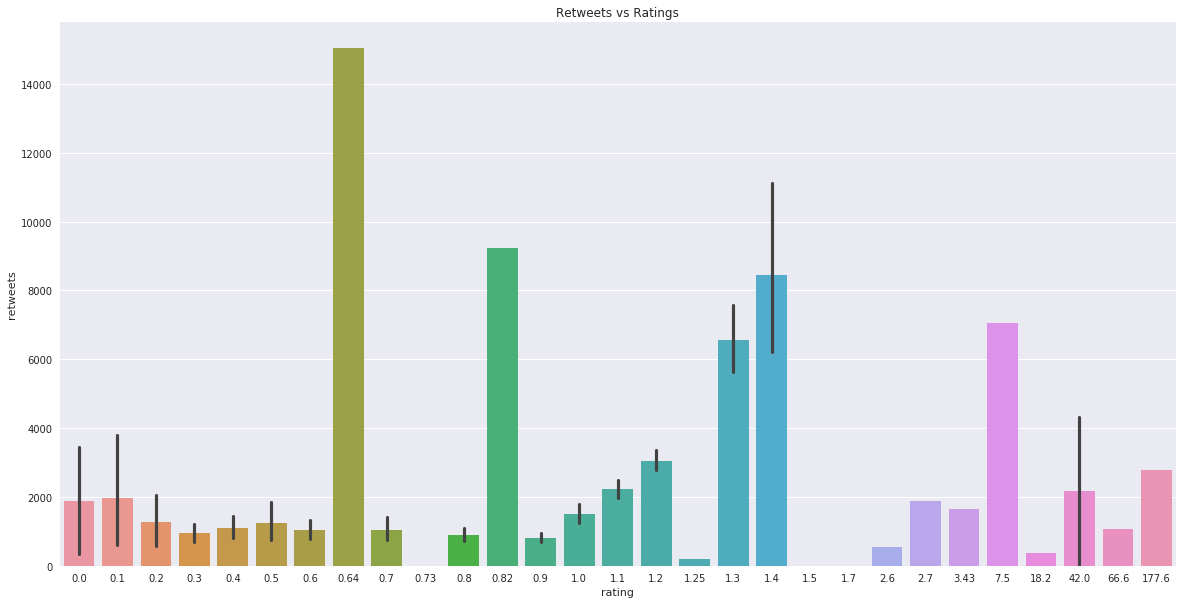

In [119]:
x = round(twitter_master['rating'],2)

y = twitter_master['retweets']
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(20, 10)})

sns.barplot(x,y).set(title='Retweets vs Ratings');

### Insights:
#### The top ten most popular dog names in our dataset are:<br>


1. Lucy
2. Charlie
3. Cooper
4. Oliver
5. Tucker
6. Penny
7. Lola
8. Sadie
9. Winston
10. Toby


#### The top ten most popular dog breeds in our dataset are:

1. Golden Retriever       
2. Labrador Retriever      
3. Pembroke              
4. Chihuahua              
5. Pug                     
6. Chow                   
7. Pomeranian              
8. Toy Poodle              
9. Samoyed                
10. Malamute               



#### The higher the rating for a dog does not necessarily equal more retweets:

Although one dog recieved a rating of 177.6, it didn't get the most retweets. The rating with the most retweets by a large margin is 0.64 with a rating of 0.82 coming in with the second.